# 1. Preparasi

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#buat fungsi untuk reduce memory.
#intinya adalah iterasi keseluruh kolom pada dataframe dan mengubah datatype yg memorynya paling kecil.
def reduce_mem_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

#fungsi untuk memanggil dataframe
def import_data(file):
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [4]:
data = import_data('/Users/achmadfauzitrinanda/Downloads/data_final.csv')

Memory usage of dataframe is 220.16 MB
Memory usage after optimization is: 73.39 MB
Decreased by 66.7%


In [5]:
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [6]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,Prev_IP_AMT_INSTALMENT,Prev_IP_AMT_PAYMENT,Prev_CCB_AMT_BALANCE,Prev_CCB_AMT_CREDIT_LIMIT_ACTUAL,Prev_CCB_AMT_DRAWINGS_CURRENT,Prev_CCB_AMT_PAYMENT_TOTAL_CURRENT,Prev_CCB_AMT_RECEIVABLE_PRINCIPAL,Prev_CCB_AMT_RECIVABLE,Prev_CCB_AMT_TOTAL_RECEIVABLE,TARGET
0,100002,0,0,0,0,202500.0,406597.5,24700.5,351000.0,248526.0,...,21081.261719,21081.261719,27858.203125,171000.000000,4996.267090,4558.888672,26644.955078,27533.273438,27533.273438,1.0
1,100003,0,0,1,0,270000.0,1293502.5,35698.5,1129500.0,40149.0,...,23136.941406,23136.941406,14996.948242,137903.218750,9184.992188,9456.458008,14305.061523,14548.675781,14548.675781,0.0
2,100004,1,1,0,0,67500.0,135000.0,6750.0,135000.0,248526.0,...,11450.142578,11450.142578,10685.238281,82025.320312,1090.424072,1530.968384,10255.441406,10597.750977,10597.750977,0.0
3,100006,0,0,0,0,135000.0,312682.5,29686.5,297000.0,248526.0,...,44632.816406,41626.031250,27858.203125,171000.000000,4996.267090,4558.888672,26644.955078,27533.273438,27533.273438,0.0
4,100007,0,0,0,0,121500.0,513000.0,21865.5,513000.0,248526.0,...,102297.515625,101564.226562,101208.390625,101250.000000,11736.103516,367.753510,88407.226562,98558.921875,98558.921875,0.0


In [7]:
#split ke data training dan testing
#karena yang akan divisualisasi hanya data training
data_train = data[:307511]

In [8]:
data_train.shape

(307511, 79)

In [9]:
data_test = data[307511:]

In [10]:
data_test.shape

(48744, 79)

# 2. Visualisasi Data Training

In [11]:
data_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,Prev_IP_AMT_INSTALMENT,Prev_IP_AMT_PAYMENT,Prev_CCB_AMT_BALANCE,Prev_CCB_AMT_CREDIT_LIMIT_ACTUAL,Prev_CCB_AMT_DRAWINGS_CURRENT,Prev_CCB_AMT_PAYMENT_TOTAL_CURRENT,Prev_CCB_AMT_RECEIVABLE_PRINCIPAL,Prev_CCB_AMT_RECIVABLE,Prev_CCB_AMT_TOTAL_RECEIVABLE,TARGET
0,100002,0,0,0,0,202500.0,406597.5,24700.5,351000.0,248526.0,...,21081.261719,21081.261719,27858.203125,171000.000000,4996.267090,4558.888672,26644.955078,27533.273438,27533.273438,1.0
1,100003,0,0,1,0,270000.0,1293502.5,35698.5,1129500.0,40149.0,...,23136.941406,23136.941406,14996.948242,137903.218750,9184.992188,9456.458008,14305.061523,14548.675781,14548.675781,0.0
2,100004,1,1,0,0,67500.0,135000.0,6750.0,135000.0,248526.0,...,11450.142578,11450.142578,10685.238281,82025.320312,1090.424072,1530.968384,10255.441406,10597.750977,10597.750977,0.0
3,100006,0,0,0,0,135000.0,312682.5,29686.5,297000.0,248526.0,...,44632.816406,41626.031250,27858.203125,171000.000000,4996.267090,4558.888672,26644.955078,27533.273438,27533.273438,0.0
4,100007,0,0,0,0,121500.0,513000.0,21865.5,513000.0,248526.0,...,102297.515625,101564.226562,101208.390625,101250.000000,11736.103516,367.753510,88407.226562,98558.921875,98558.921875,0.0


In [12]:
for columns in data_train.columns:
    print(columns)

SK_ID_CURR
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_ID_PUBLISH
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
FLAG_DOCUMENT_3
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_11
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
Bureau_AMT_CREDIT_MAX_OVERDUE
Bureau_AMT_CREDIT_SUM
Bureau_AMT_CREDIT_SUM_DEBT
Bur

# 2.1 Distribusi dari Target

<AxesSubplot:xlabel='TARGET', ylabel='count'>

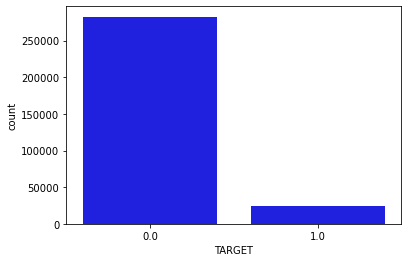

In [13]:
sns.countplot(data_train['TARGET'], color='blue')

In [14]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 79 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   SK_ID_CURR                          307511 non-null  int32  
 1   NAME_CONTRACT_TYPE                  307511 non-null  int8   
 2   FLAG_OWN_CAR                        307511 non-null  int8   
 3   FLAG_OWN_REALTY                     307511 non-null  int8   
 4   CNT_CHILDREN                        307511 non-null  int8   
 5   AMT_INCOME_TOTAL                    307511 non-null  float32
 6   AMT_CREDIT                          307511 non-null  float32
 7   AMT_ANNUITY                         307511 non-null  float32
 8   AMT_GOODS_PRICE                     307511 non-null  float32
 9   NAME_TYPE_SUITE                     307511 non-null  float32
 10  NAME_INCOME_TYPE                    307511 non-null  float32
 11  NAME_EDUCATION_TYPE       

- Dari data diatas dapat dilihat bahwa target imbalance.
- perlu dilakukan treatment sebelum modelling.

# 2.2 Distribusi dari Gender

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

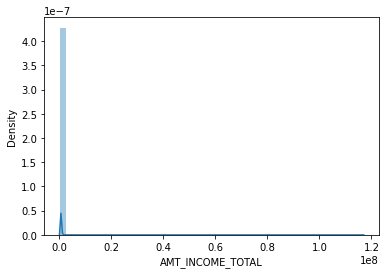

In [16]:
sns.distplot(data_train['AMT_INCOME_TOTAL'])

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

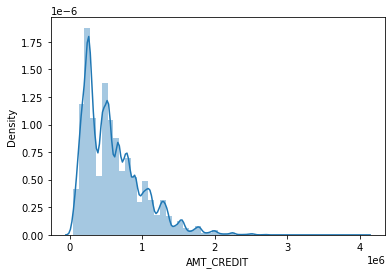

In [17]:
sns.distplot(data_train['AMT_CREDIT'])

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

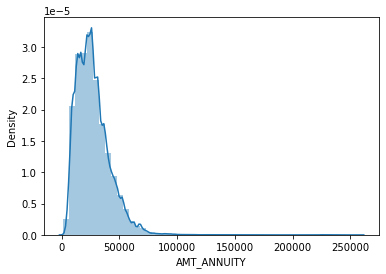

In [18]:
sns.distplot(data_train['AMT_ANNUITY'])

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

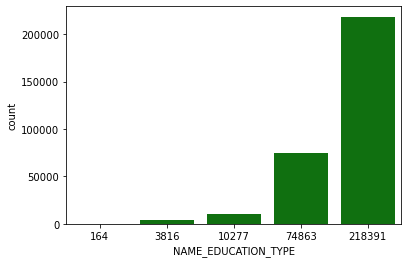

In [19]:
sns.countplot(data_train['NAME_EDUCATION_TYPE'], color='green')

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

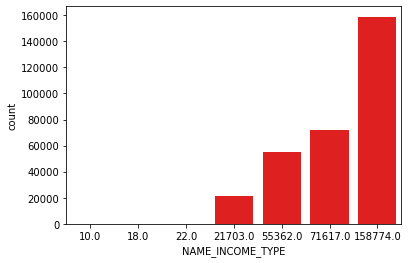

In [20]:
sns.countplot(data_train['NAME_INCOME_TYPE'], color='red')

In [23]:
no_age = data_train[data_train['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = data_train[data_train['TARGET']==1]['DAYS_BIRTH'].values/-365

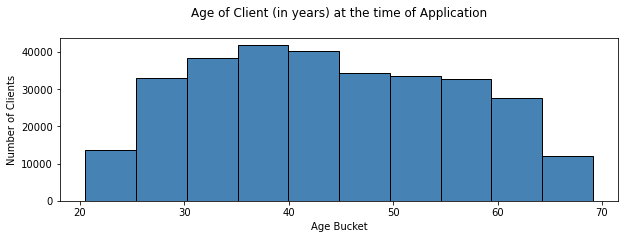

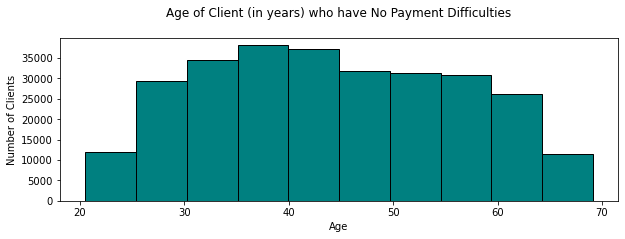

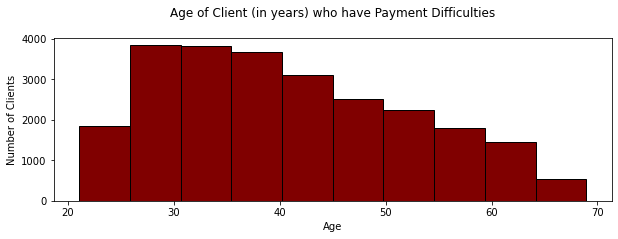

In [24]:
plt.figure(figsize=(10,3))
plt.hist(data_train['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='steelblue')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='teal')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

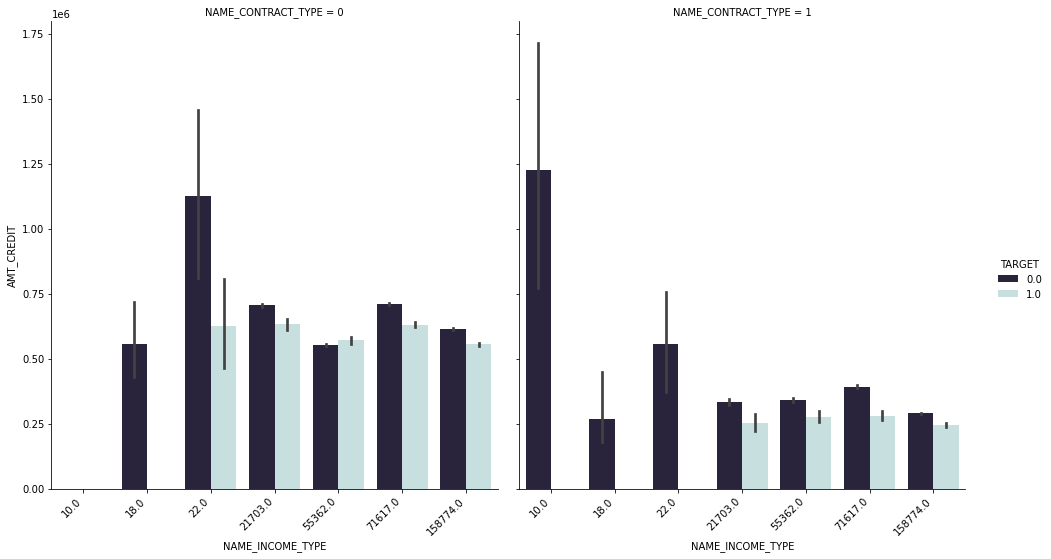

In [25]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = data_train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()